## Reading Data

In [1]:
##!git clone https://github.com/alexeygrigorev/mlbookcamp-code

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("..//Car price prediction using ML//mlbookcamp-code//chapter-02-car-price//data.csv")
len(df)

11914

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
len(df.columns)

16

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

Make : 48
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: Make, dtype: int64

********************

Model : 915
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: Model, dtype: int64

********************

Year : 28
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: Year, dtype: int64

********************

Engine Fuel Type : 10
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
diesel                             154
Name: Engine Fuel Type, dtype: int64

********************

Engine HP : 356
200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
Name: Engine HP, dtype: int64

********************

Engine Cylinders : 9
4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
Name: Engine Cylinders, dtype: int64

## Some Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
df.columns=df.columns.str.lower().str.replace(' ','_')
string_columns=list(df.dtypes[df.dtypes=="object"].index)
print(string_columns)


['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [10]:
for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','_')
df.columns    

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [11]:
df.rename(columns={'msrp':'price'},inplace=True)
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [12]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [13]:
df.describe(include='O')

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


## target variable analysis(Price)

<AxesSubplot:xlabel='price', ylabel='Count'>

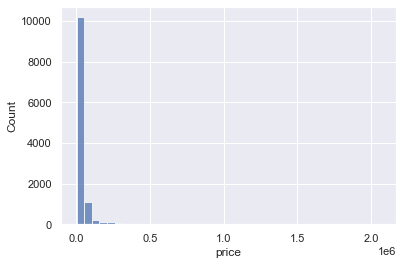

In [14]:
sns.histplot(df.price,bins=40)

<AxesSubplot:xlabel='price', ylabel='Count'>

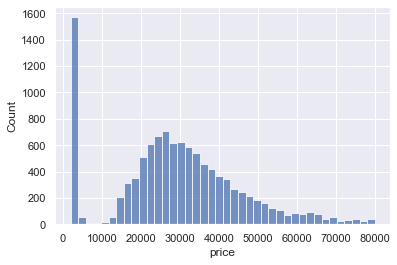

In [15]:
sns.histplot(df.price[df.price<80000],bins=40)

## log transformation

<AxesSubplot:xlabel='log_price', ylabel='Count'>

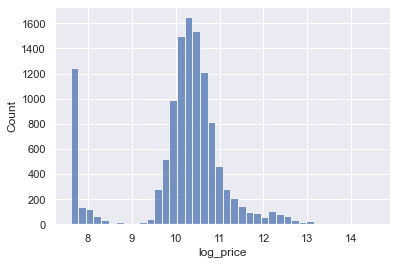

In [16]:
df['log_price']=np.log1p(df.price)
sns.histplot(df.log_price,bins=40)

In [17]:
df.price.skew()

11.771987129334972

In [18]:
df.log_price.skew()

-0.9178678067039072

## check missing value

In [19]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

## What's the average price of BMW cars in the dataset?

In [20]:
df.make.value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyker    

In [21]:
df.groupby('make').mean()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price
make,,,,,,,,,
acura,2010.063492,244.797619,5.333333,3.619048,28.111111,19.940476,204.0,3.488759e+04,10.139427
alfa_romeo,2015.400000,237.000000,4.000000,2.000000,34.000000,24.000000,113.0,6.160000e+04,11.024077
aston_martin,2013.021505,484.322581,10.623656,2.150538,18.892473,12.526882,259.0,1.979104e+05,12.142572
audi,2012.231707,277.695122,5.557927,3.469512,28.823171,19.585366,3105.0,5.345211e+04,10.475010
bentley,2011.702703,533.851351,9.729730,2.675676,18.905405,11.554054,520.0,2.471693e+05,12.399268
bmw,2014.347305,326.907186,5.958084,3.161677,29.245509,20.739521,3916.0,6.154676e+04,10.908461
bugatti,2008.333333,1001.000000,16.000000,2.000000,14.000000,8.000000,820.0,1.757224e+06,14.370527
buick,2010.005102,219.244898,5.316327,3.836735,26.948980,18.704082,155.0,2.820661e+04,9.959522
cadillac,2013.151134,332.309824,6.433249,3.602015,25.236776,17.355164,1624.0,5.623132e+04,10.809539


In [22]:
df.groupby('make').mean()['price']['bmw']

61546.76347305389

## Compare the average price for cars before / after year 2015

In [23]:
df[df['year']>=2015]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
32,fiat,124_spider,2017,premium_unleaded_(recommended),160.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,35,26,819,27495,10.221796
33,fiat,124_spider,2017,premium_unleaded_(recommended),160.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,35,26,819,24995,10.126471
34,fiat,124_spider,2017,premium_unleaded_(recommended),160.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,35,26,819,28195,10.246935
41,bmw,2_series,2016,premium_unleaded_(required),240.0,4.0,automatic,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,35,23,3916,32850,10.399737
42,bmw,2_series,2016,premium_unleaded_(required),240.0,4.0,automatic,rear_wheel_drive,2.0,luxury,compact,convertible,34,23,3916,38650,10.562328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,bmw,z4,2015,premium_unleaded_(required),300.0,6.0,automated_manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,24,17,3916,56950,10.949947
11899,bmw,z4,2015,premium_unleaded_(required),335.0,6.0,automated_manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,24,17,3916,65800,11.094390
11900,bmw,z4,2016,premium_unleaded_(required),300.0,6.0,automated_manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,24,17,3916,57500,10.959558
11901,bmw,z4,2016,premium_unleaded_(required),240.0,4.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,34,22,3916,49700,10.813780


In [24]:
df.price.mean()

40594.737032063116

In [25]:
df[df['year']>=2015]['price'].mean()

45667.156463719766

In [26]:
df[df['year']<2015]['price'].mean()

35457.18770062511

## Validation Framework

In [27]:
np.random.seed(2)
n=len(df)
n_val=int(0.2*n)
n_test=int(0.2*n)
n_train=n-(n_val+n_test)
print('No. of rows for training : ', n_train)
print('No. of rows for validation : ', n_val)
print('No. of rows for testing : ', n_test)

No. of rows for training :  7150
No. of rows for validation :  2382
No. of rows for testing :  2382


In [28]:
idx=np.arange(n)
print(idx)
np.random.shuffle(idx)
print(idx)

[    0     1     2 ... 11911 11912 11913]
[2735 6720 5878 ... 6637 2575 7336]


In [29]:
df_shuffled=df.iloc[idx]
print(df.index)
print(df_shuffled.index)

RangeIndex(start=0, stop=11914, step=1)
Int64Index([ 2735,  6720,  5878, 11190,  4554,  8001,  2882,   649,   616,
             4459,
            ...
             6751,   433,  4770, 11527,  1099,  2514, 11798,  6637,  2575,
             7336],
           dtype='int64', length=11914)


In [30]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.739349
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,10.290483
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,10.448744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120,10.739024
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670,10.945018
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620,10.832122
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920,10.838031


In [31]:
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410,9.575747
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685,9.887663
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795,9.893235
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000,7.601402
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260,10.937757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052,7.627057
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995,10.165698
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100,10.278528
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200,10.007893


In [32]:
df_train=df_shuffled.iloc[:n_train].copy()
df_val=df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test=df_shuffled.iloc[n_train+n_val:].copy()

In [33]:
df_train.shape

(7150, 17)

In [34]:
df_val.shape

(2382, 17)

In [35]:
df_test.shape

(2382, 17)

In [36]:
y_train=df_train.log_price.values
y_val=df_val.log_price.values
y_test=df_test.log_price.values

## Baseline Solution

In [37]:
base=['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.0,6.0,26,19,3916
1,300.0,6.0,28,19,3916
2,300.0,6.0,28,20,3916
3,230.0,6.0,28,18,3916
4,230.0,6.0,28,18,3916
...,...,...,...,...,...
11909,300.0,6.0,23,16,204
11910,300.0,6.0,23,16,204
11911,300.0,6.0,23,16,204
11912,300.0,6.0,23,16,204


In [38]:
df[base].isnull().sum()

engine_hp           69
engine_cylinders    30
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

## Handling Missing Values

In [39]:
def prepare_x(df):
    df_num=df[base]
    df_num=df_num.fillna(df_num.mean())
    x=df_num.values
    return x

## Linear Regression

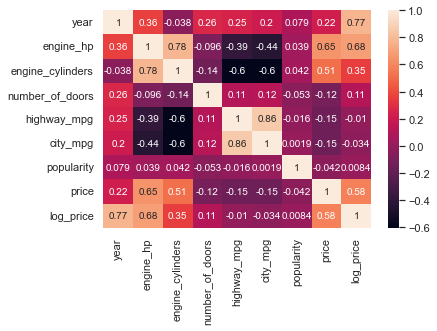

In [40]:
_=sns.heatmap(df_train.corr(),annot=True)

In [41]:
def linear_reg(xi):
    n=len(xi)
    pred=w0
    for j in range(n):
        pred+=w[j]+xi[j]
    return pred    

## Normal Equation

In [42]:
def train_linear_reg(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w=XTX_inv.dot(X.T).dot(y)
    return w[0],w[1:]    

In [43]:
X_train=prepare_x(df_train)
w0,w=train_linear_reg(X_train,y_train)
y_pred=w0+X_train.dot(w)

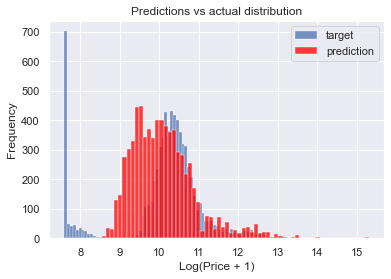

In [44]:
sns.histplot(y_train, label='target')
sns.histplot(y_pred, label='prediction', color='red')

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## Model Evaluation(RMSE)

In [45]:
def rmse(y,y_pred):
    error=y_pred-y
    mse=(error**2).mean()
    return np.sqrt(mse)

In [46]:
rmse(y_train,y_pred)

0.7574439819012008

In [47]:
x_val=prepare_x(df_val)
y_pred_val=w0+x_val.dot(w)

In [48]:
rmse(y_val,y_pred_val)

0.750250234638193

## Simple Feature Engineering

In [49]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [50]:
sorted(df.year.unique())

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [51]:
def prepare_x(df):
    df=df.copy()
    features=base.copy()
    df['age']=2017-df.year
    features.append('age')
    df_num=df[features]
    df_num=df_num.fillna(df_num.mean())
    x=df_num.values
    return x

In [52]:
x_train = prepare_x(df_train)
w0, w = train_linear_reg(x_train, y_train)
y_pred = w0 + x_train.dot(w)
print('Train RMSE: ', rmse(y_train, y_pred))

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)
print('Validation RMSE: ', rmse(y_val, y_pred))

Train RMSE:  0.5117454503079418
Validation RMSE:  0.5070033906013008


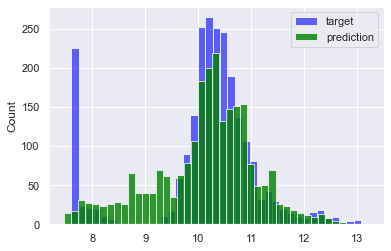

In [53]:
sns.histplot(y_val, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='green', alpha=0.8, bins=40)

plt.legend()

## one hot encoding

In [54]:
df.number_of_doors.value_counts()

4.0    8353
2.0    3160
3.0     395
Name: number_of_doors, dtype: int64

In [55]:
df['make'].value_counts().head(10)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
nissan         558
gmc            515
honda          449
mazda          423
cadillac       397
Name: make, dtype: int64

In [56]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [57]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [58]:
df['driven_wheels'].value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [59]:
df['market_category'].value_counts().head(5)

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

In [60]:
df['vehicle_size'].value_counts().head(5)

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [61]:
df['vehicle_style'].value_counts().head(5)

sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64

In [62]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
    
        
        

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [63]:
x_train = prepare_x(df_train)
w0, w = train_linear_reg(x_train, y_train)

y_pred = w0 + x_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4722721358371601
validation: 0.4653694386690286


In [64]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)
        
        

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [65]:
x_train = prepare_x(df_train)
w0, w = train_linear_reg(x_train, y_train)

y_pred = w0 + x_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 15.804203683512888
validation: 14.351927702290201


## Regularization

In [66]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [68]:
X_train = prepare_x(df_train)

In [69]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, -5595763546212533.00, 4.02, 5595763546212371.00
0.001, 6.96, -0.10, 1.76
 0.01, 6.95, -0.10, 1.76
  0.1, 6.82, -0.10, 1.73
    1, 6.04, -0.10, 1.52
   10, 4.32, -0.09, 1.07


In [72]:
X_train = prepare_x(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_x(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 15.804203683512888
val 14.351927702290201


In [75]:
X_train = prepare_x(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_x(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.4623435461976384
val 0.45751588645645874


In [77]:
X_train = prepare_x(df_train)
X_val = prepare_x(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.45750362564036556
0.0001 0.4575033133491148
 0.001 0.4575044543854318
  0.01 0.45751588645645874
   0.1 0.4576325827727011
     1 0.4589046994756139
     5 0.46450155470613436
    10 0.47078493716319136


In [80]:
X_train = prepare_x(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_x(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_x(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.45751588645645874
test: 0.45460022123326627


## using the model

In [81]:
i=2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031,
 'price': 31120,
 'log_price': 10.345638111452145}

In [82]:
X_test = prepare_x(pd.DataFrame([ad]))
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

array([28468.75675402])